In [1]:
import os; import numpy as np; import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

os.chdir(r'E:\Dropbox\SEL\Python functions\OpenSim Analysis\d_Results Analysis')
from Utils import Normalize_JR #, plot_MeanStd

In [2]:
## 조건별 데이터 입력

    # 피험자 번호 입력
# input_SUB = input("Which Number of SUB? : ")
# sub_name = 'SUB'+str(input_SUB)
sub_name = 'SUB1'

    # 데이터 로드 위치
root_dir = 'E:\\Dropbox\\SEL\\BOX\\OpenSim\\_Main_\\c_AddBio_Continous' #SUB1\\APP1\\trial10_15_1\\JR_Results\\
APP_li = ['APP1_Crop', 'APP2', 'APP4']
kg_bpm = '15_10'
UpDown_li = ['U', 'D']

save_dir = "E:\\Dropbox\\SEL\\BOX\\Analysis\\JR\\SUB1(AddBiomech)"
os.makedirs(save_dir, exist_ok=True)

In [3]:
#     # 피규어 저장 위치 샘플
# savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\JR\\"+ sub_name +"\\Figures\\"
#                 + sub_name +r" Lower Body Joint Angles (APP1,2,4).tif")

In [3]:
## Loading JR Results

for APP in APP_li:
    for UpDown in UpDown_li:
        save_name = sub_name +'_'+ APP +'_'+ UpDown +'_JR'
        locals()[save_name] = Normalize_JR(root_dir, sub_name, APP, kg_bpm, UpDown)
        # savemat(root_dir +'\\'+ sub_name +'\\'+ APP +'\\'+ save_name +'.mat', locals()[save_name])
        # df = pd.DataFrame.from_dict(data=locals()[save_name], orient='columns')
        # df.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\JR\\SUB1\\"+ save_name +".csv")
        

In [4]:
# 헤더 이름 리스트로 불러와보기
joint_name = list(locals()[save_name].keys())
print(f'Joint Name List: {joint_name}')
joint_name = [key[:-2] for key in joint_name]   # 뒤에 fx,y,z , mx,y,z , px,y,z 없애기
print(f'Number of Header: {len(joint_name)}')

joint_name = list(dict.fromkeys(joint_name))    # 순서를 유지하면서 중복된 원소를 제거 
print(f'Joint Name List: {joint_name}')
print(f'Number of Joint: {len(joint_name)}')



Joint Name List: ['ground_pelvis_on_pelvis_in_pelvis_fx', 'ground_pelvis_on_pelvis_in_pelvis_fy', 'ground_pelvis_on_pelvis_in_pelvis_fz', 'ground_pelvis_on_pelvis_in_pelvis_mx', 'ground_pelvis_on_pelvis_in_pelvis_my', 'ground_pelvis_on_pelvis_in_pelvis_mz', 'ground_pelvis_on_pelvis_in_pelvis_px', 'ground_pelvis_on_pelvis_in_pelvis_py', 'ground_pelvis_on_pelvis_in_pelvis_pz', 'sacrumjnt_on_sacrum_in_sacrum_fx', 'sacrumjnt_on_sacrum_in_sacrum_fy', 'sacrumjnt_on_sacrum_in_sacrum_fz', 'sacrumjnt_on_sacrum_in_sacrum_mx', 'sacrumjnt_on_sacrum_in_sacrum_my', 'sacrumjnt_on_sacrum_in_sacrum_mz', 'sacrumjnt_on_sacrum_in_sacrum_px', 'sacrumjnt_on_sacrum_in_sacrum_py', 'sacrumjnt_on_sacrum_in_sacrum_pz', 'hip_r_on_femur_r_in_femur_r_fx', 'hip_r_on_femur_r_in_femur_r_fy', 'hip_r_on_femur_r_in_femur_r_fz', 'hip_r_on_femur_r_in_femur_r_mx', 'hip_r_on_femur_r_in_femur_r_my', 'hip_r_on_femur_r_in_femur_r_mz', 'hip_r_on_femur_r_in_femur_r_px', 'hip_r_on_femur_r_in_femur_r_py', 'hip_r_on_femur_r_in_femur

In [5]:
def plot_MeanStd(data, Graph=True, Label=False, color='blue', withStd=True, output=False):
    """
    numpy를 이용해 평균과 표준편차를 구한 뒤
    matplotlib.pyplot으로 평균 그래프와 표준편차 영역을 함께 보여주는 그래프를 그리고
    통계 검정을 위해 평균과 표준편차를 반환해주는 함수
    
    @ data :       1차원 데이터만 포함된 넘파이 배열 (e.g.어떤 관절의 XYZ중 한 방향의 데이터)
    @ color :      원하는 색깔, 따옴표 표시 필요함
    @ withStd :    표준편차를 평균과 함께 표시할지 아닐지에 대한 옵션
    @ output :     평균과 표준편차 반환이 필요한 경우에 함수 실행시 입력하고,
                   두 반환값을 저장할 수 있는 형식으로 표현해야 함.
    
    e.g.)   anc_mean, anc_std = ces.plot_MeanStd( test_sub2_anc_RANKLE_X, 'red', output=True )
            ------필요시-------                                                  -----------
            
    @ input : legend에 써놓을 값을 입력받도록 함
    """
    # 넘파이로 mean, std 구하기
    mean_data = np.array([])
    std_data  = np.array([])
    mean_data = np.append(mean_data, data.mean(axis=0))
    std_data  = np.append(std_data,  data.std (axis=0))
        # axis = 0 : 한 열의 모든 값을 연산, 
        #        1 : 한 행의 모든 값을 연산!
    
    if Graph != False:
        # mean 그리기
        if Label != False:
            plt.plot(mean_data, c=color, label=Label, linewidth = 2.5)  # legend에 써놓을 값을 입력받도록 함
        else:
            plt.plot(mean_data, c=color, linewidth = 2.5)
        
        # std 영역 지정 후 그리기
        if withStd == True:
            plt.fill_between(range(len(mean_data)), mean_data - std_data, mean_data + std_data,
                            alpha = 0.2, linewidth = 0, edgecolor=color, facecolor=color, antialiased=True)
            # fill_between(x, y_start, y_end,   
            #              alpha:색 투명도(max=1.0), linewidth:영역 테두리 두께,
            #              edgecolor:테두리색?, facecolor:영역 내부 색, antialiased=True:?)
    
    # 평균과 표준편차를 반환하길 원하면
    if output != False:
        return mean_data, std_data

### L5S1 Joint Load

In [6]:
# Resultant Force 데이터 저장
j1 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fx'
j2 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fy'
j3 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fz'

L5S1_U_APP1 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP1_Crop_U_JR'][j1]**2) + (locals()[sub_name+'_APP1_Crop_U_JR'][j2]**2) + (locals()[sub_name+'_APP1_Crop_U_JR'][j3]**2)))
L5S1_U_APP2 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP2_U_JR'][j1]**2) + (locals()[sub_name+'_APP2_U_JR'][j2]**2) + (locals()[sub_name+'_APP2_U_JR'][j3]**2)))
L5S1_U_APP4 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP4_U_JR'][j1]**2) + (locals()[sub_name+'_APP4_U_JR'][j2]**2) + (locals()[sub_name+'_APP4_U_JR'][j3]**2)))
L5S1_D_APP1 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP1_Crop_D_JR'][j1]**2) + (locals()[sub_name+'_APP1_Crop_D_JR'][j2]**2) + (locals()[sub_name+'_APP1_Crop_D_JR'][j3]**2)))
L5S1_D_APP2 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP2_D_JR'][j1]**2) + (locals()[sub_name+'_APP2_D_JR'][j2]**2) + (locals()[sub_name+'_APP2_D_JR'][j3]**2)))
L5S1_D_APP4 = pd.DataFrame(np.sqrt((locals()[sub_name+'_APP4_D_JR'][j1]**2) + (locals()[sub_name+'_APP4_D_JR'][j2]**2) + (locals()[sub_name+'_APP4_D_JR'][j3]**2)))

# L5S1_U_APP1 = L5S1_U_APP1.T
# L5S1_U_APP2 = L5S1_U_APP2.T
# L5S1_U_APP4 = L5S1_U_APP4.T
# L5S1_D_APP1 = L5S1_D_APP1.T
# L5S1_D_APP2 = L5S1_D_APP2.T
# L5S1_D_APP4 = L5S1_D_APP4.T

L5S1_U_APP1.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_U_APP1_Crop.csv"))
L5S1_U_APP2.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_U_APP2.csv"))
L5S1_U_APP4.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_U_APP4.csv"))
L5S1_D_APP1.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_D_APP1_Crop.csv"))
L5S1_D_APP2.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_D_APP2.csv"))
L5S1_D_APP4.to_csv(os.path.join(save_dir, f"L5S1_Resultant_{kg_bpm}_D_APP4.csv"))

## RMSE

In [7]:

def Calculate_RMSE(measured_df, predicted_df, intervals):
    """
    측정값과 추정값 사이의 구간별 RMSE 평균과 표준편차를 계산하는 함수.

    Parameters:
    - measured_df (pd.DataFrame): 측정된 데이터 (반복 횟수 x 시간 스텝).
    - predicted_df (pd.DataFrame): 추정된 데이터 (반복 횟수 x 시간 스텝).
    - intervals (list of tuple): 시간 구간을 나타내는 (start, end) 튜플의 리스트.

    Returns:
    - result_dict (dict): 각 구간별 RMSE 평균과 표준편차를 담은 딕셔너리.
    """
    result_dict = {'Interval': [], 'RMSE_Mean': [], 'RMSE_Std': []}

    for start, end in intervals:
        # 해당 구간의 데이터 추출
        measured_segment = measured_df.iloc[:, start:end].to_numpy()
        predicted_segment = predicted_df.iloc[:, start:end].to_numpy()

        # 구간별 RMSE 계산 (반복별 RMSE)
        rmse_values = np.sqrt(np.mean((measured_segment - predicted_segment) ** 2, axis=1))

        # 결과 저장
        result_dict['Interval'].append(f"{start}-{end}")
        result_dict['RMSE_Mean'].append(np.mean(rmse_values))
        result_dict['RMSE_Std'].append(np.std(rmse_values))

    return result_dict

# intervals 정의: 4개 구간 (0-25%, 25-50%, 50-75%, 75-100%)
n_points = 101  # 총 시간 스텝 수 (예제)
intervals = [(0, n_points // 4), 
             (n_points // 4, n_points // 2), 
             (n_points // 2, 3 * n_points // 4), 
             (3 * n_points // 4, n_points)]

# 사용 예시
# # 예제 데이터: 측정값과 추정값 (각각 10회 반복 측정)
# measured_df = pd.DataFrame(np.random.rand(10, n_points) * 100)  # 임의의 측정값
# predicted_df = measured_df + pd.DataFrame(np.random.randn(10, n_points) * 10)  # 임의의 추정값

# RMSE 계산
# rmse_results = Calculate_RMSE(measured_df, predicted_df, intervals)
# print("구간별 RMSE:", rmse_results)



In [8]:
RMSE_dir = os.path.join(save_dir,"RMSE")
os.makedirs(RMSE_dir, exist_ok=True)

RMSE_L5S1_U_APP2 = Calculate_RMSE(L5S1_U_APP1, L5S1_U_APP2 ,intervals)
RMSE_L5S1_U_APP4 = Calculate_RMSE(L5S1_U_APP1, L5S1_U_APP4 ,intervals)
RMSE_L5S1_D_APP2 = Calculate_RMSE(L5S1_D_APP1, L5S1_D_APP2 ,intervals)
RMSE_L5S1_D_APP4 = Calculate_RMSE(L5S1_D_APP1, L5S1_D_APP4 ,intervals)

RMSE_L5S1_U_APP2 = pd.DataFrame(RMSE_L5S1_U_APP2)
RMSE_L5S1_U_APP2.to_csv(os.path.join(RMSE_dir,'RMSE_L5S1_U_APP2.csv'))
RMSE_L5S1_U_APP4 = pd.DataFrame(RMSE_L5S1_U_APP4)
RMSE_L5S1_U_APP4.to_csv(os.path.join(RMSE_dir,'RMSE_L5S1_U_APP4.csv'))
RMSE_L5S1_D_APP2 = pd.DataFrame(RMSE_L5S1_D_APP2)
RMSE_L5S1_D_APP2.to_csv(os.path.join(RMSE_dir,'RMSE_L5S1_D_APP2.csv'))
RMSE_L5S1_D_APP4 = pd.DataFrame(RMSE_L5S1_D_APP4)
RMSE_L5S1_D_APP4.to_csv(os.path.join(RMSE_dir,'RMSE_L5S1_D_APP4.csv'))

## Figures

### L5S1 Lifting 

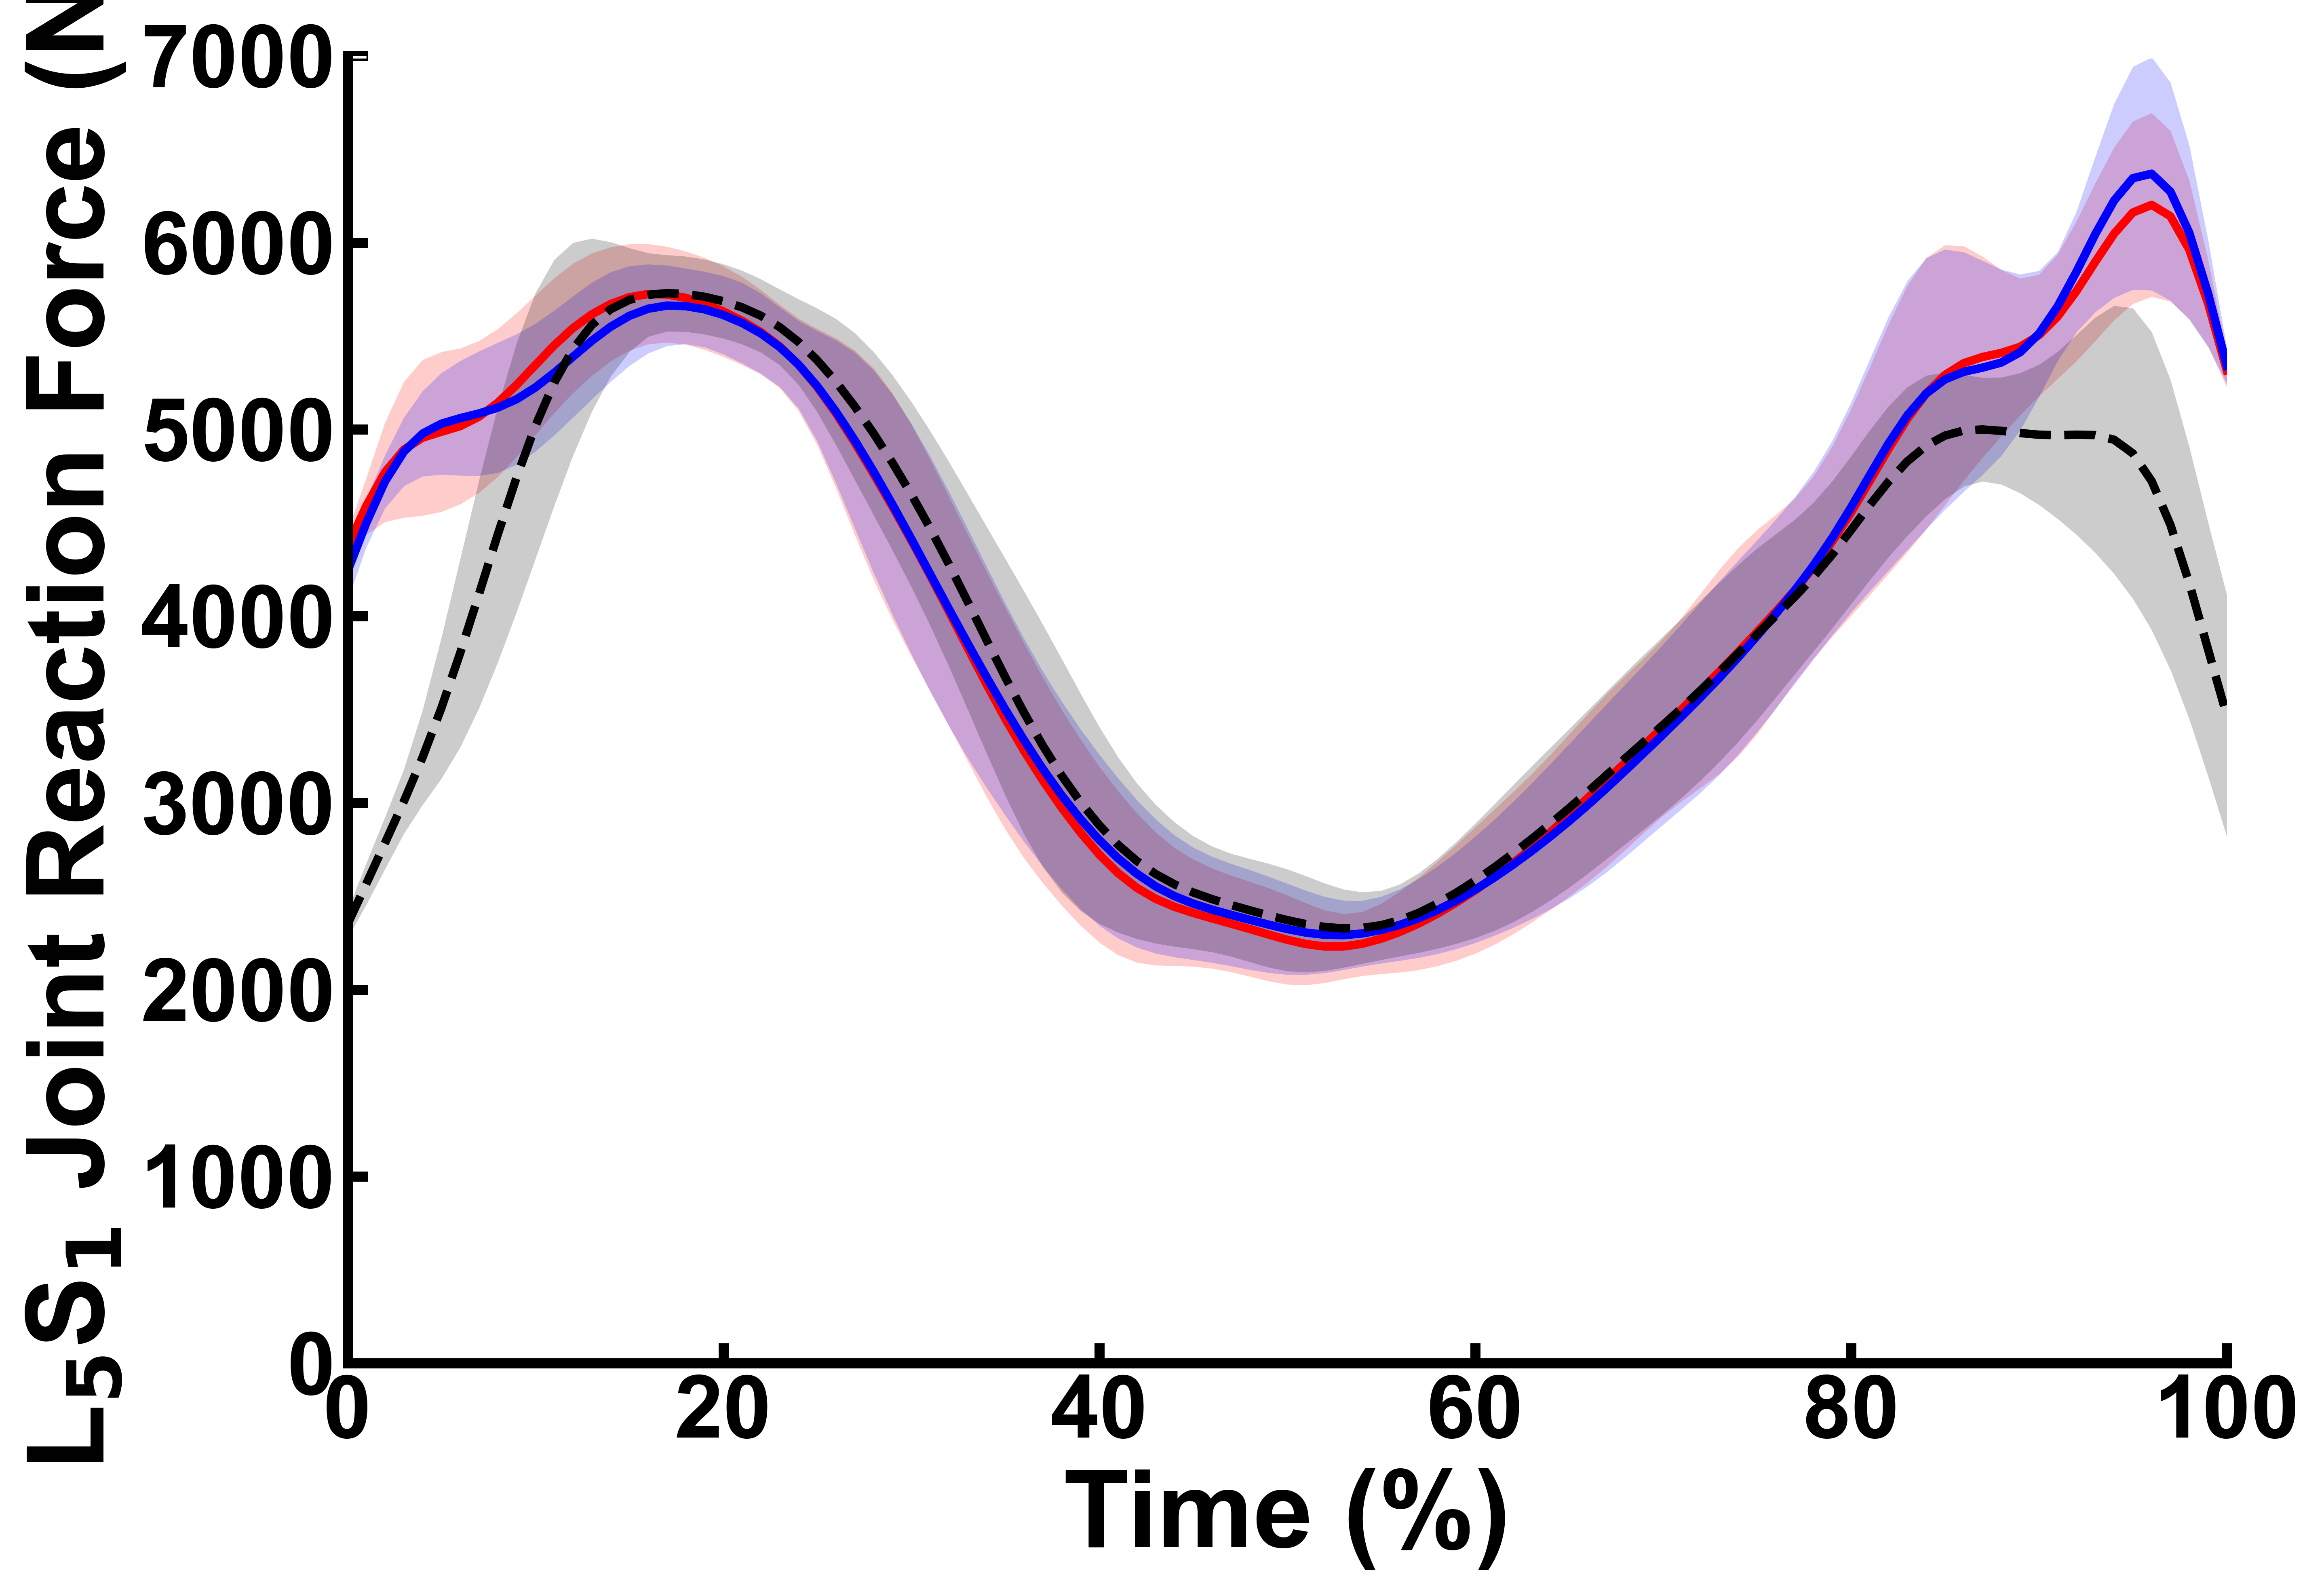

In [7]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline

j1 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fx'
j2 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fy'
j3 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fz'

fig = plt.figure(figsize=(10,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')
Arial = fm.FontProperties(fname='C:\\Windows\\Fonts\\arial.ttf')

plt.rcParams['font.family'] = Arial.get_name()
plt.rcParams['font.size'] = 26.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6

ax1 = fig.add_subplot(111)
plt.rcParams['lines.linestyle'] = '-'
graph2 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP2_U_JR'][j1]**2) + (locals()[sub_name+'_APP2_U_JR'][j2]**2) + (locals()[sub_name+'_APP2_D_JR'][j3]**2)), Label='APP2', color='red')
graph3 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP4_U_JR'][j1]**2) + (locals()[sub_name+'_APP4_U_JR'][j2]**2) + (locals()[sub_name+'_APP4_D_JR'][j3]**2)), Label='APP4', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP1_U_JR'][j1]**2) + (locals()[sub_name+'_APP1_U_JR'][j2]**2) + (locals()[sub_name+'_APP1_D_JR'][j3]**2)), Label='APP1', color='black')
graph4 = plt.plot(np.zeros(101))
# graph4 = plt.plot(np.ones(101)*500, c='white')
graph5 = plt.plot(np.ones(101)*7000, c='white')

plt.ylabel(r'L$_{5}$S$_{1}$ Joint Reaction Force (N)', fontsize=32 )
plt.xlabel('Time (%)', fontsize=32 )

# savefig_name = "E:\Dropbox\SEL\BOX\Analysis\JR\SUB1\Figures\L5S1 Joint Reaction Force ("+kg_bpm+"_U).tif"
savefig_name = os.path.join(save_dir,"Figures",f"Resultant L5S1 ({kg_bpm}_U).tif")
os.makedirs(os.path.dirname(savefig_name), exist_ok=True)
plt.savefig(savefig_name)

### L5S1 Lowering (ASB)

ASB 피규어 (확)

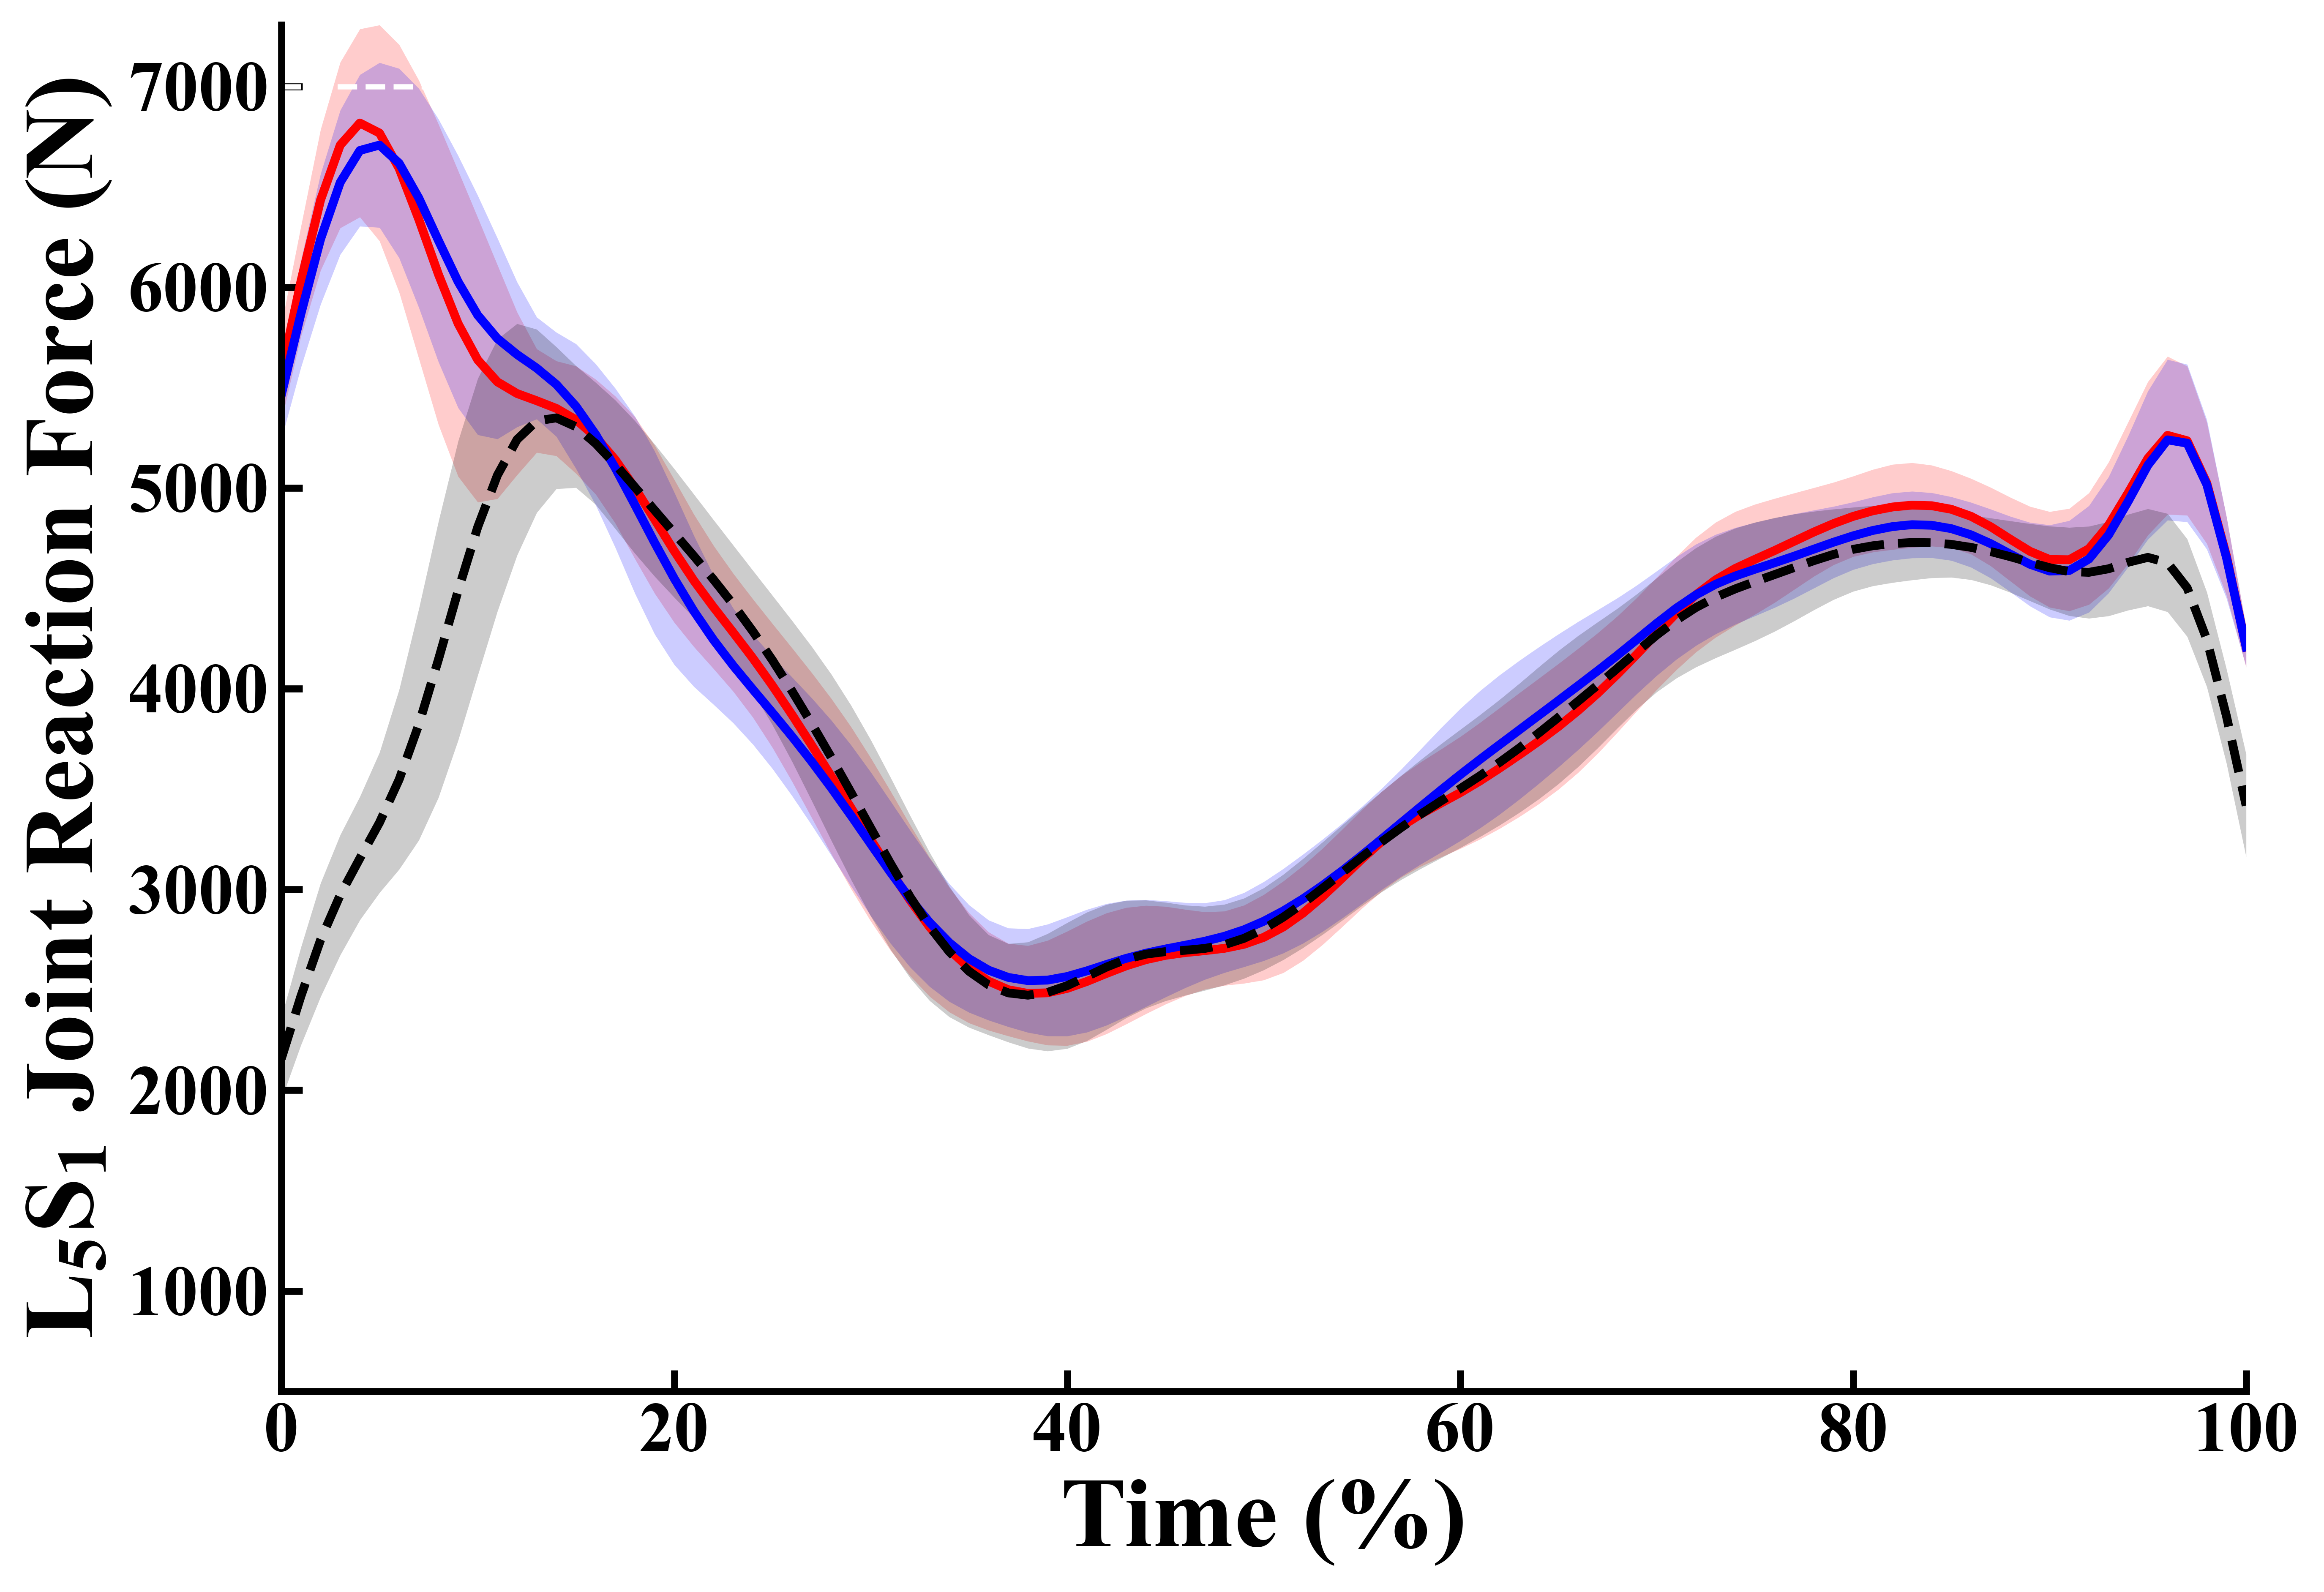

In [8]:
# ASB 피규어 (확)
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline

j1 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fx'
j2 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fy'
j3 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fz'

# fig = plt.figure(figsize=(10,7))
fig = plt.figure(figsize=(10,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6

ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph2 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP2_D_JR'][j1]**2) + (locals()[sub_name+'_APP2_D_JR'][j2]**2) + (locals()[sub_name+'_APP2_D_JR'][j3]**2)), Label='APP2', color='red')
graph3 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP4_D_JR'][j1]**2) + (locals()[sub_name+'_APP4_D_JR'][j2]**2) + (locals()[sub_name+'_APP4_D_JR'][j3]**2)), Label='APP4', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd(np.sqrt((locals()[sub_name+'_APP1_D_JR'][j1]**2) + (locals()[sub_name+'_APP1_D_JR'][j2]**2) + (locals()[sub_name+'_APP1_D_JR'][j3]**2)), Label='APP1', color='black')
# graph4 = plt.plot(np.zeros(101))
graph4 = plt.plot(np.ones(101)*500, c='white')
graph5 = plt.plot(np.ones(101)*7000, c='white')

plt.ylabel(r'L$_{5}$S$_{1}$ Joint Reaction Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

savefig_name = os.path.join(save_dir,"Figures",f"Resultant L5S1 ({kg_bpm}_D).tif")
os.makedirs(os.path.dirname(savefig_name), exist_ok=True)
plt.savefig(savefig_name)

### L5S1 Lowering Diff

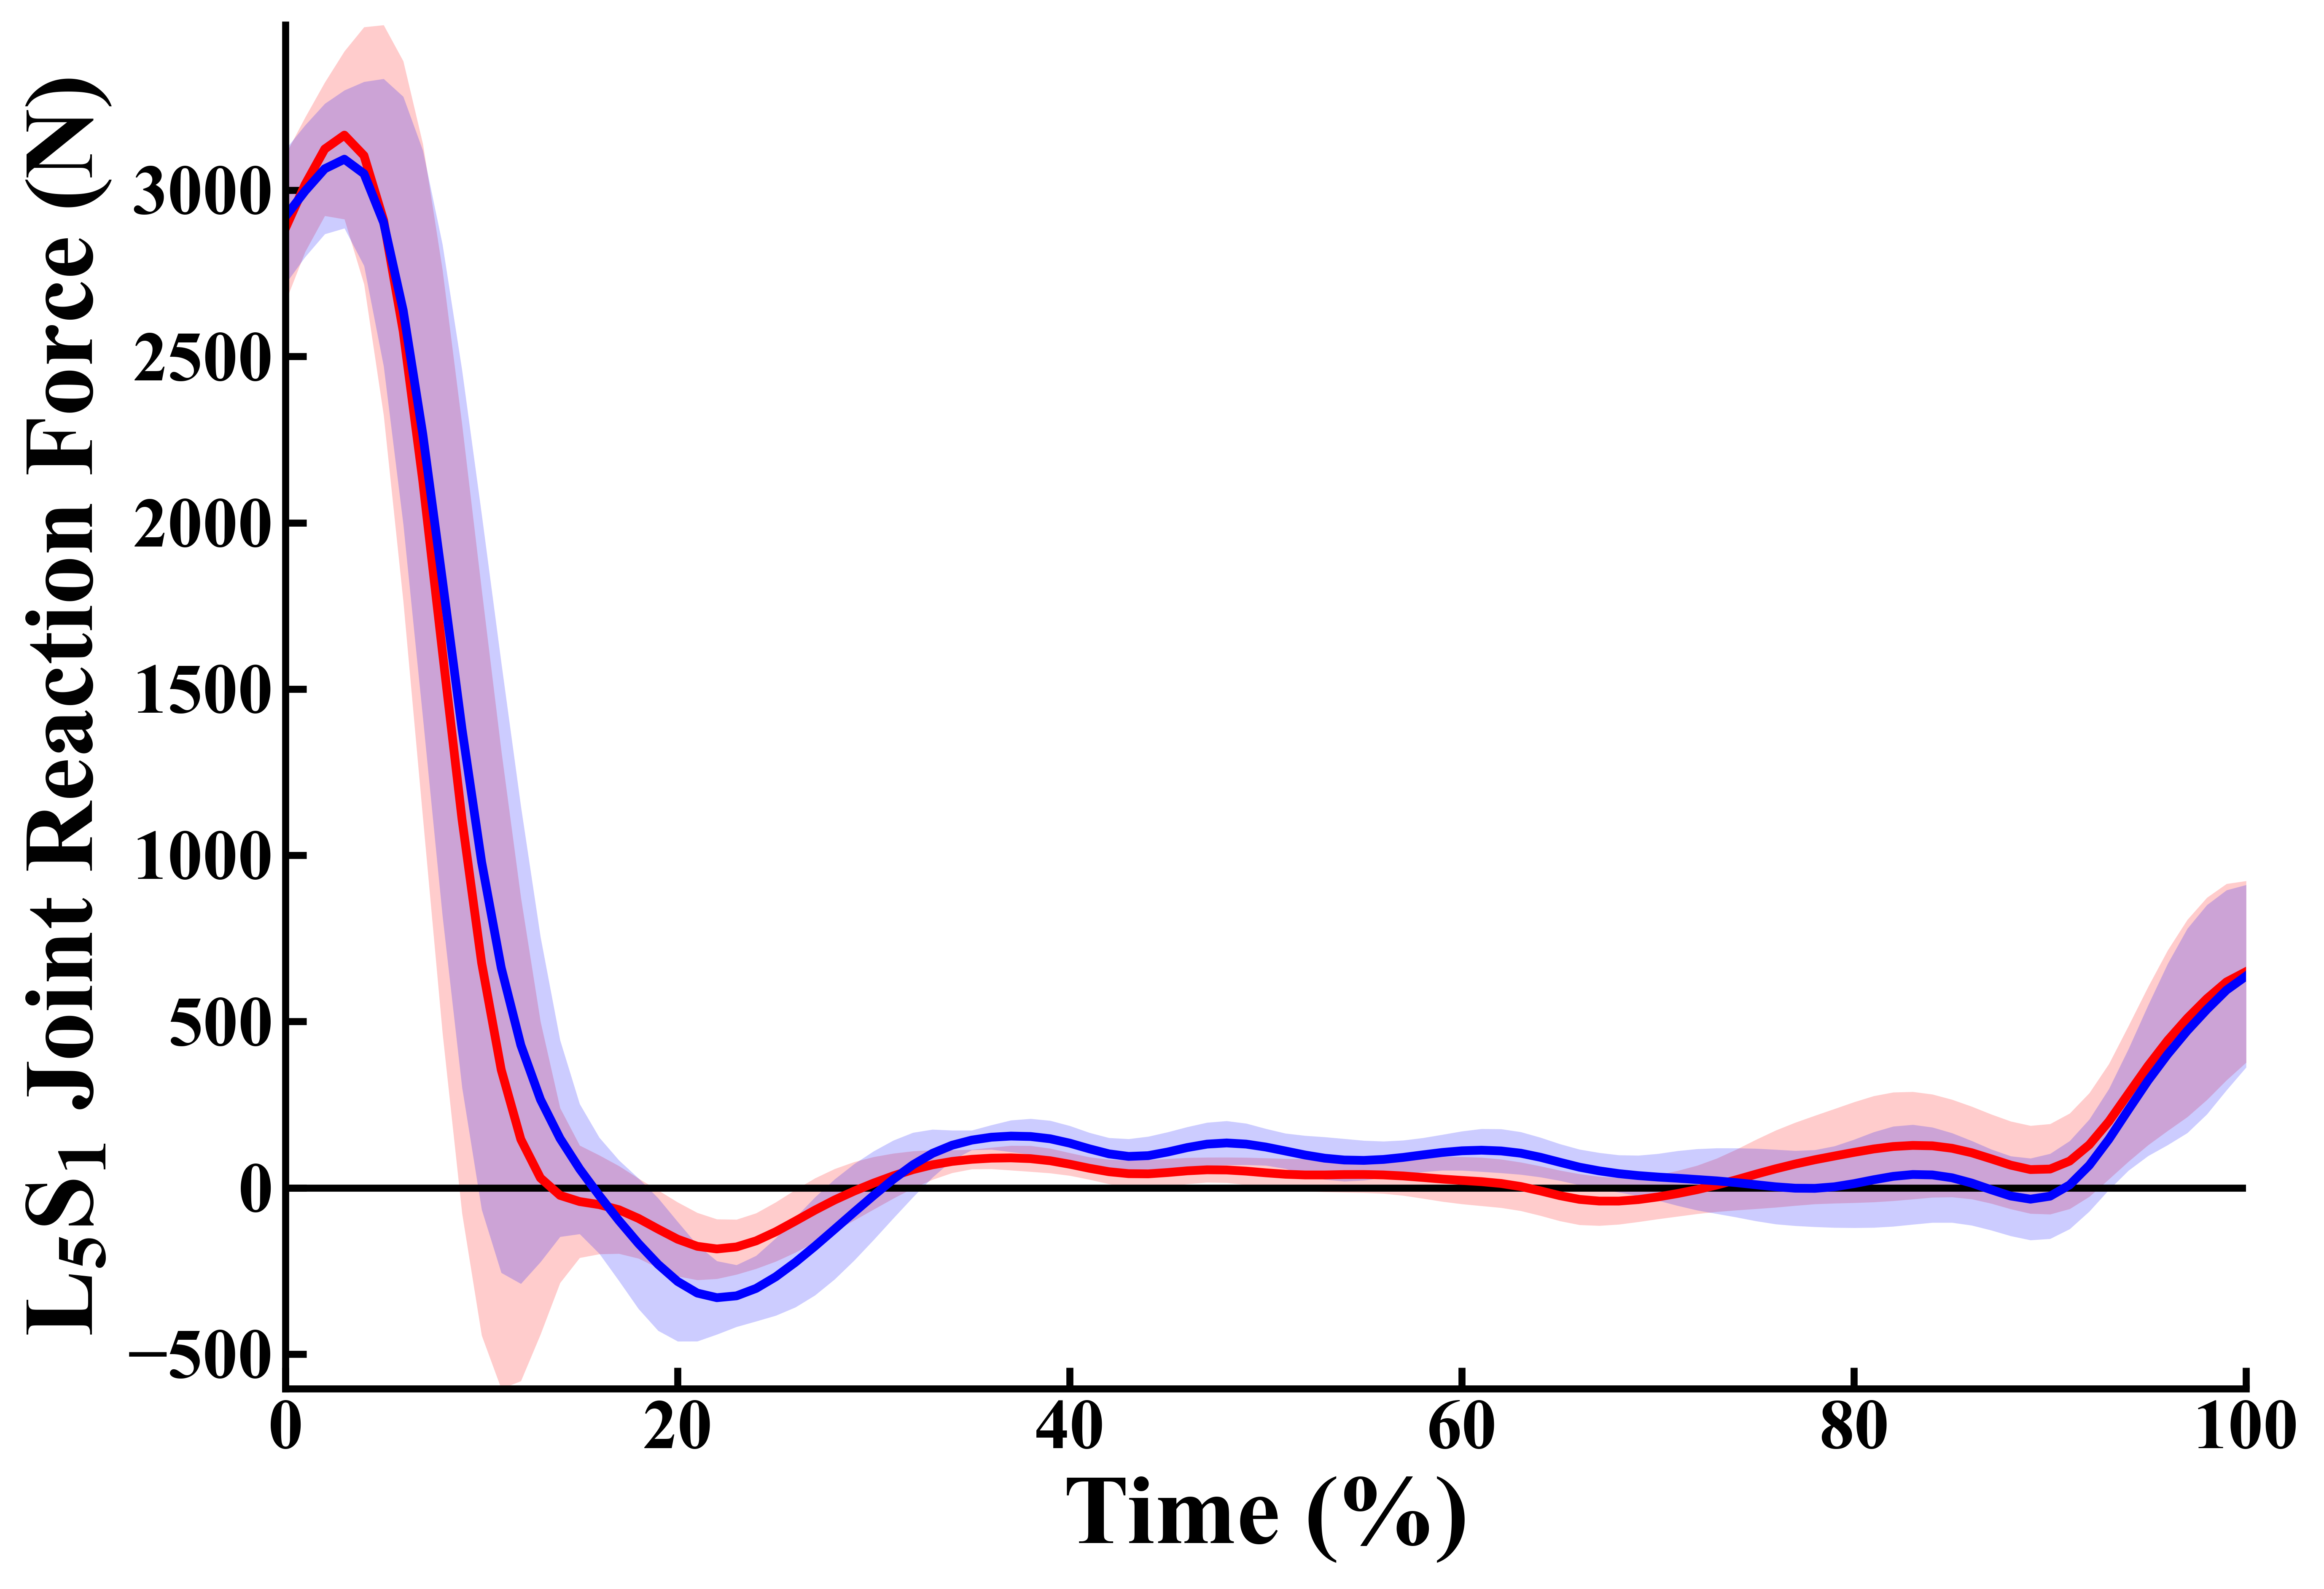

In [18]:
# Diff.
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline

j1 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fx'
j2 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fy'
j3 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fz'

L5S1_APP1_D_Resultant = np.sqrt((locals()[sub_name+'_APP1_D_JR'][j1]**2) + (locals()[sub_name+'_APP1_D_JR'][j2]**2) + (locals()[sub_name+'_APP1_D_JR'][j3]**2))
L5S1_APP2_D_Resultant = np.sqrt((locals()[sub_name+'_APP2_D_JR'][j1]**2) + (locals()[sub_name+'_APP2_D_JR'][j2]**2) + (locals()[sub_name+'_APP2_D_JR'][j3]**2))
L5S1_APP4_D_Resultant = np.sqrt((locals()[sub_name+'_APP4_D_JR'][j1]**2) + (locals()[sub_name+'_APP4_D_JR'][j2]**2) + (locals()[sub_name+'_APP4_D_JR'][j3]**2))

fig = plt.figure(figsize=(10,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6

ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), c='black', linewidth=2)
graph2 = plot_MeanStd(L5S1_APP2_D_Resultant - L5S1_APP1_D_Resultant, Label='APP2-1', color='red')
graph3 = plot_MeanStd(L5S1_APP4_D_Resultant - L5S1_APP1_D_Resultant, Label='APP4-1', color='blue')
# graph4 = plt.plot(np.ones(101)*500, c='white')
# graph5 = plt.plot(np.ones(101)*7000, c='white')

plt.ylabel(r'L$_{5}$S$_{1}$ Joint Reaction Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

savefig_name = "E:\Dropbox\SEL\BOX\Analysis\JR\SUB1\Figures\L5S1 Joint Reaction Force Diff.("+kg_bpm+"_D).tif"
# plt.savefig(savefig_name)

### L5S1

In [5]:

## JR plot (LowerBody)

%matplotlib tk

j1 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fx'
j2 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fy'
j3 = 'L5_S1_IVDjnt_on_lumbar5_in_lumbar5_fz'

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j1], Label='APP4', color='blue')
plt.title('Lifting\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax2 = fig.add_subplot(323)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j1], Label='APP4', color='blue')
plt.title('Lowering\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax6 = fig.add_subplot(326)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('L5S1 Joint Load', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'L5S1 Joint Load')

### Shoulder

In [6]:

## JR plot (LowerBody)

%matplotlib tk

j1 = 'acromial_r_on_humerus_r_in_humerus_r_fx'
j2 = 'acromial_r_on_humerus_r_in_humerus_r_fy'
j3 = 'acromial_r_on_humerus_r_in_humerus_r_fz'

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j1], Label='APP4', color='blue')
plt.title('Lifting\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax2 = fig.add_subplot(323)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j1], Label='APP4', color='blue')
plt.title('Lowering\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax6 = fig.add_subplot(326)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('Shoulder Joint Load', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'Shoulder Joint Load')

### Elbow

In [8]:

## JR plot (LowerBody)

%matplotlib tk

j1 = 'elbow_r_on_ulna_r_in_ulna_r_fx'
j2 = 'elbow_r_on_ulna_r_in_ulna_r_fy'
j3 = 'elbow_r_on_ulna_r_in_ulna_r_fz'

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j1], Label='APP4', color='blue')
plt.title('Lifting\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax2 = fig.add_subplot(323)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_U_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_U_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_U_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j1], Label='APP1', color='black')
graph2 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j1], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j1], Label='APP4', color='blue')
plt.title('Lowering\nFx', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph4 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j2], Label='APP1', color='black')
graph5 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j2], Label='APP2', color='red')
graph6 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j2], Label='APP4', color='blue')
plt.title('Fy', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='upper right')
plt.grid()

ax6 = fig.add_subplot(326)
graph7 = plot_MeanStd(locals()[sub_name+'_APP1_D_JR'][j3], Label='APP1', color='black')
graph8 = plot_MeanStd(locals()[sub_name+'_APP2_D_JR'][j3], Label='APP2', color='red')
graph9 = plot_MeanStd(locals()[sub_name+'_APP4_D_JR'][j3], Label='APP4', color='blue')
plt.title('Fz', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('Elbow Joint Load', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'Elbow Joint Load')